In [3]:
import pandas as pd
import glob
import seaborn as sns

In [4]:
def read_file(file):
    """
    Read a file to a dict of lists.

    :param str file: Path to a sample file.
    :return: dict of lists of records
    :rtype: dict
    """
    vcf_dict = []
    #df = pd.DataFrame()
    with open(file, 'r') as invcf:
        for line in invcf:
            if line.startswith('track'):
                continue
                
    
    
            line = line.strip().split()
            CHR = line[0]
            START = line[1]
            END = line[2]
            SCORE = line[3]
            name = str(file.split('/')[-1]) 
            
            if SCORE == '2':
                continue
                
            if SCORE > 4:
                continue
            
            vcf_dict.append([name, CHR, START,END, SCORE])
            
            
def read_multiple_files(path_of_files):
    """
    Read the path of vcf files to a dataframe.
    :param str file: Path to a files.
    :return: dict of lists of  records
    :rtype: dict
    """
    files = glob.glob(path_of_files+'*')
    chm13list = []
    for file in files:
        #return pd.DataFrame(read_vcf(file))
        chm13list.append(read_file(file))
    
    return (chm13list)



            


In [7]:
chm13_new = pd.read_csv('/Users/luciabazan/Downloads/AFR_Gambian_LP6005442-DNA_H10.csv')
chm13_new['#"chrom"'] = chm13_new['#"chrom"'].str.replace('chr', '')
#chm13_new['#"chrom"'] = chm13_new['#"chrom"'].astype(int)
chm13_new['lenght'] = chm13_new['chromEnd'] - chm13_new['chromStart']

chm13_new = chm13_new[chm13_new['lenght'] > 1000] #more than 1kb 
chm13_new = chm13_new.loc[(chm13_new['lenght'] < 1000000),:]  #less than 1Mb
#chm13_new['ID'].hist(bins=100, log=True)

#chm13_new = chm13_new.drop(chm13_new[chm13_new.score == 2 ])


#chm13_new.drop(chm13_new[chm13_new['score'] == 2 ])

chm13_new = chm13_new[chm13_new['name'] != 2]
chm13_new = chm13_new[chm13_new['name'] < 5]
chm13_new


,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID,lenght
69,1,212443,223266,4,0,+,0,0,"65,105,225",4.348822,10823
83,1,246711,248501,4,0,+,0,0,"65,105,225",3.651929,1790
84,1,248501,253471,4,0,+,0,0,"65,105,225",4.242768,4970
89,1,260453,261566,4,0,+,0,0,"65,105,225",3.907993,1113
90,1,261566,263205,4,0,+,0,0,"65,105,225",3.669257,1639
...,...,...,...,...,...,...,...,...,...,...,...
1179213,22,51286137,51288688,4,0,+,0,0,"65,105,225",3.646106,2551
1179215,22,51289688,51291273,4,0,+,0,0,"65,105,225",3.958392,1585
1179216,22,51291273,51292827,4,0,+,0,0,"65,105,225",3.654707,1554
1179217,22,51292827,51295018,4,0,+,0,0,"65,105,225",3.879225,2191


In [8]:
file = '../CHM13_SGDP/LP6005442-DNA_H10'

In [9]:
vcf_dict = []
    #df = pd.DataFrame()
with open(file, 'r') as invcf:
    for line in invcf:
        if line.startswith('track'):
            continue
        
        line = line.strip().split()
        CHR = line[0]
        START = line[1]
        END = line[2]
        SCORE = line[3]
        name = str(file.split('/')[-1]) 
            
        #if SCORE == '2':
        #    continue
            
        vcf_dict.append([name, CHR, START,END, SCORE])

In [11]:
chm13_old = pd.DataFrame(vcf_dict)

chm13_old.columns = ['SAMPLE', 'CHR', 'START', 'END', 'SCORE']
chm13_old['START'] = chm13_old['START'].astype(int)
chm13_old['END'] = chm13_old['END'].astype(int)
chm13_old['SCORE'] = chm13_old['SCORE'].astype(int)
chm13_old['LENGHT'] = chm13_old['END'] - chm13_old['START']


# MORE THAN 1K AND LESS THAN 1M 
chm13_old = chm13_old[chm13_old['LENGHT'] > 1000] #more than 1kb 
chm13_old = chm13_old.loc[(chm13_old['LENGHT'] < 1000000),:] 


chm13_old = chm13_old[chm13_old['SCORE'] != 2]
chm13_old = chm13_old[chm13_old['SCORE'] < 5]
chm13_old

,SAMPLE,CHR,START,END,SCORE,LENGHT
18,LP6005442-DNA_H10,CP068255.2,8916,12222,3,3306
19,LP6005442-DNA_H10,CP068255.2,12222,70111,1,57889
23,LP6005442-DNA_H10,CP068255.2,79662,98643,1,18981
26,LP6005442-DNA_H10,CP068255.2,105118,116978,1,11860
27,LP6005442-DNA_H10,CP068255.2,116978,121245,1,4267
...,...,...,...,...,...,...
1179173,LP6005442-DNA_H10,CP086569.2,62227677,62253121,4,25444
1179210,LP6005442-DNA_H10,CP086569.2,62425307,62426562,4,1255
1179211,LP6005442-DNA_H10,CP086569.2,62426562,62428429,3,1867
1179218,LP6005442-DNA_H10,CP086569.2,62435647,62438529,4,2882


In [12]:
feature_table = pd.read_table('../data/GCF_009914755.1_T2T-CHM13v2.0_feature_table.txt')#, index_col='chromosome')
report = pd.read_table('../data/GCF_009914755.1_T2T-CHM13v2.0_assembly_report.txt')


/var/folders/05/q9klbb6d06d76xy7b8th0xf40000gn/T/ipykernel_96513/3172910145.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  feature_table = pd.read_table('../data/GCF_009914755.1_T2T-CHM13v2.0_feature_table.txt')#, index_col='chromosome')


In [13]:
genbankid = list(report['GenBank-Accn'])
ch = list(report['Assigned-Molecule'])

chm13_old['CHR'] = chm13_old['CHR'].replace(genbankid, ch)
chm13_old = chm13_old.sort_values(by='CHR')
chm13_old 

,SAMPLE,CHR,START,END,SCORE,LENGHT
1097178,LP6005442-DNA_H10,1,46956998,46958677,4,1679
1111340,LP6005442-DNA_H10,1,83243745,83245597,4,1852
1111339,LP6005442-DNA_H10,1,83241398,83243745,4,2347
1111337,LP6005442-DNA_H10,1,83239187,83240398,4,1211
1111336,LP6005442-DNA_H10,1,83237852,83239187,4,1335
...,...,...,...,...,...,...
1174776,LP6005442-DNA_H10,Y,13250732,13255795,1,5063
1174775,LP6005442-DNA_H10,Y,13248561,13250732,0,2171
1174774,LP6005442-DNA_H10,Y,13241144,13248561,1,7417
1174781,LP6005442-DNA_H10,Y,13276935,13281364,1,4429


<AxesSubplot:>

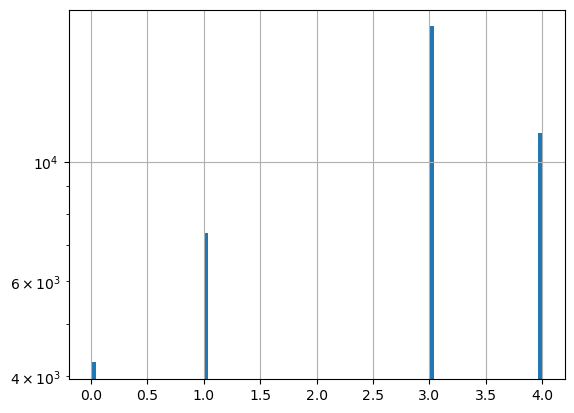

In [14]:
chm13_old['SCORE'].hist(bins=100, log=True)

<AxesSubplot:>

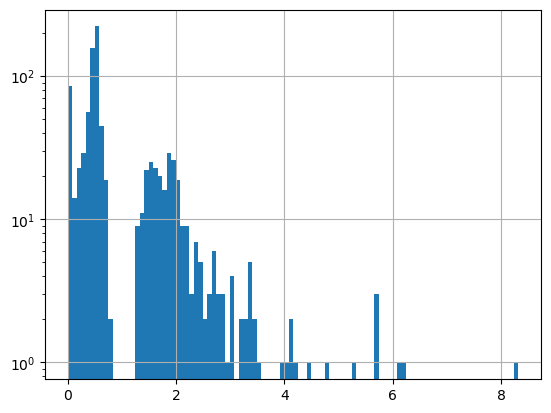

In [15]:
hg19 = pd.read_csv('../data/cnvator_data_sudmant_overlapped.csv')
hg19 = hg19.loc[hg19['Sample_ID'] == 'LP6005442-DNA_H10'] 
hg19['RD'].hist(bins=100, log=True)

<AxesSubplot:xlabel='Chr', ylabel='RD'>

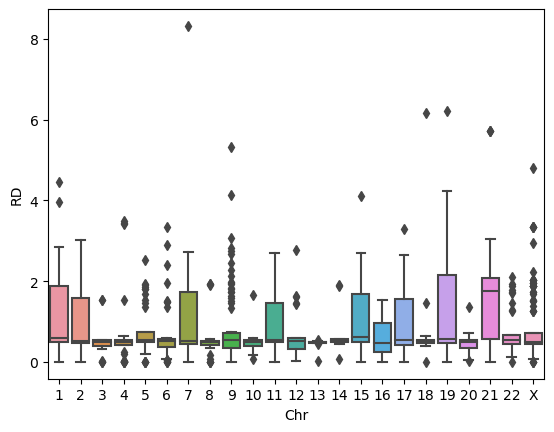

In [16]:
sns.boxplot(data=hg19, x="Chr", y="RD")

<AxesSubplot:xlabel='#"chrom"', ylabel='ID'>

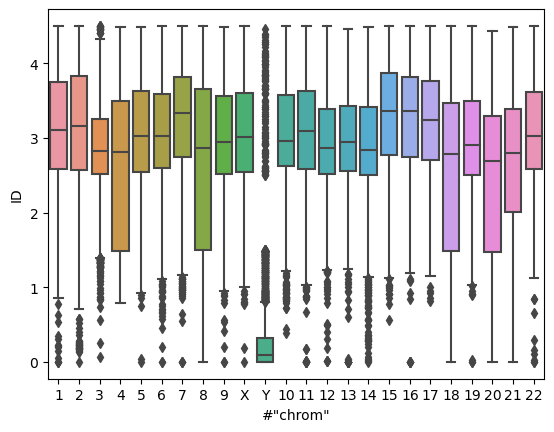

In [17]:
sns.boxplot(data=chm13_new, x='#"chrom"', y="ID")

<AxesSubplot:xlabel='#"chrom"', ylabel='ID'>

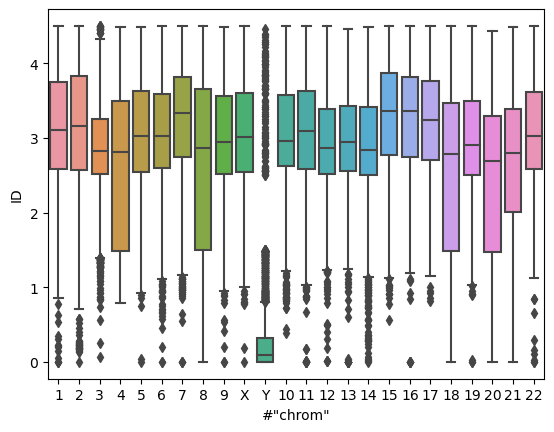

In [18]:
sns.boxplot(data=chm13_new, x='#"chrom"', y="ID")

<AxesSubplot:xlabel='CHR', ylabel='SCORE'>

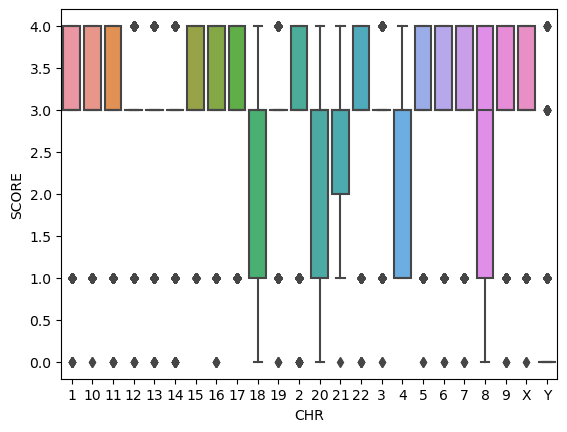

In [19]:
sns.boxplot(data=chm13_old, x='CHR', y="SCORE")

In [20]:
chm13_gene = pd.read_csv('/Users/luciabazan/Downloads/chm13_gene_regions.csv', index_col=0)
chm13_gene = chm13_gene.loc[chm13_gene['SAMPLE'] == 'LP6005442-DNA_H10'] 
chm13_gene

chm13_gene['CHR'] = chm13_gene['CHR'].str.replace('chr', '')
chm13_gene = chm13_gene.sort_values(by='CHR')

<AxesSubplot:xlabel='CHR', ylabel='SCORE'>

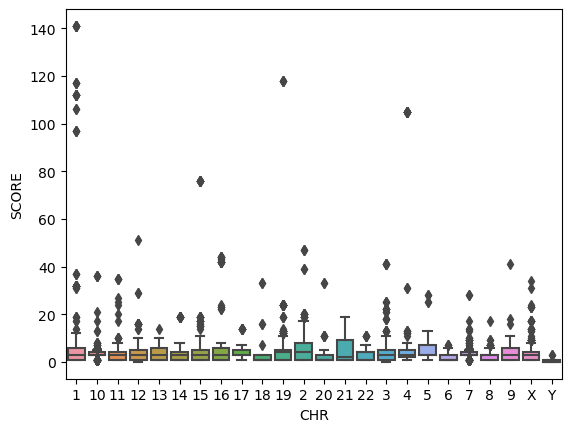

In [21]:
sns.boxplot(data=chm13_gene, x='CHR', y="SCORE")


In [22]:
chm13_gene_anotation = feature_table.merge(report, left_on='genomic_accession', right_on='RefSeq-Accn')
chm13_gene_anotation[chm13_gene_anotation['class'] == 'protein_coding']
gene_anotation = pd.DataFrame()
gene_anotation['CHR'] = chm13_gene_anotation['chromosome']
gene_anotation['START'] = chm13_gene_anotation['start']
gene_anotation['END'] = chm13_gene_anotation['end']
gene_anotation['CHR'] = gene_anotation['CHR'].apply(str)
gene_anotation = gene_anotation.drop_duplicates()
#gene_anotation['CHR_2'] = chm13_gene_anotation['chromosome'] 


#### Filtering cnvs just in protein coding regions 

overlapped = []

chm13_np = chm13_new.to_numpy()
gene_anotation_np = gene_anotation.to_numpy()

for cnv in chm13_np:
    for gene in gene_anotation_np:
    
        if cnv[0] == gene[0]: #Chromosome
            # CNVS in gene regions
            if (gene[1] <= cnv[1] <= gene[2]) or (gene[1] <= cnv[2] <= gene[2]):
                #leng_dqna = (cnv_q[3]-cnv_q[2])
                #leng_cnvnator = (cnv_c[2]-cnv_c[1])
                #if (leng_dqna/leng_cnvnator)>0.6:
                overlapped.append([cnv[0], cnv[1], cnv[2], cnv[3], cnv[-2]])
                    #overlapped.append(cnv_q)
            # SUDMANT DATA CNVS in QDNASEQ CNVs(QDNASEQ bigger than SUDMANT DATA)
            
          #  if (cnv[1] <= gene[1] <= cnv[2]) or (cnv[1] <= gene[2] <= cnv[2]):
                #leng_dq/na = (cnv_q[3]-cnv_q[2])
                #leng_cnvnator = (cnv_c[2]-cnv_c[1])
                #if (leng_cnvnator/leng_dqna)>0.6:
              #  overlapped.append([cnv[0], gene[3], cnv[2], cnv[3], gene[1], gene[2], cnv[4], cnv[6]])
                    #overlapped.append([cnv_q, cnv_c])
                    #overlapped.append(cnv_q)



In [23]:
chm13 = pd.DataFrame(overlapped)
chm13

,0,1,2,3,4
0,1,212443,223266,4,4.348822
1,1,212443,223266,4,4.348822
2,1,246711,248501,4,3.651929
3,1,248501,253471,4,4.242768
4,1,260453,261566,4,3.907993
...,...,...,...,...,...
69581,22,51292827,51295018,4,3.879225
69582,22,51292827,51295018,4,3.879225
69583,22,51296018,51297237,4,4.247849
69584,22,51296018,51297237,4,4.247849


In [24]:
chm13_gene = chm13.drop_duplicates()
chm13_gene.columns = ['chr', 'start', 'end', 'score', 'id']
chm13_gene

,chr,start,end,score,id
0,1,212443,223266,4,4.348822
2,1,246711,248501,4,3.651929
3,1,248501,253471,4,4.242768
4,1,260453,261566,4,3.907993
7,1,261566,263205,4,3.669257
...,...,...,...,...,...
69571,22,51286137,51288688,4,3.646106
69574,22,51289688,51291273,4,3.958392
69577,22,51291273,51292827,4,3.654707
69580,22,51292827,51295018,4,3.879225


<AxesSubplot:xlabel='chr', ylabel='id'>

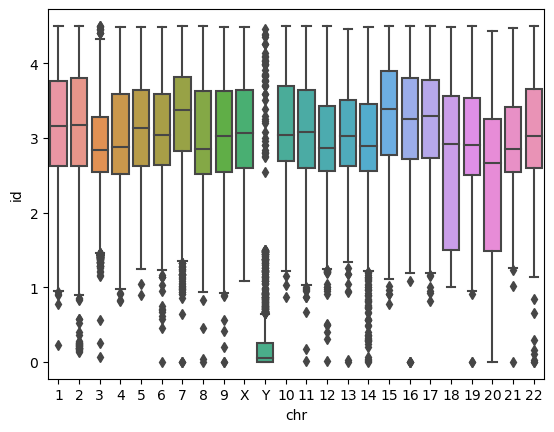

In [25]:
sns.boxplot(data=chm13_gene, x="chr", y="id")

In [270]:
chm13_new = chm13_new[chm13_new['name'] < 10]
chm13_new

,"#""chrom""",chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,ID,lenght
66,1,203733,207453,8,0,+,0,0,"255,165,0",8.341647,3720
68,1,208564,212443,9,0,+,0,0,"139,26,26",9.312706,3879
69,1,212443,223266,4,0,+,0,0,"65,105,225",4.348822,10823
70,1,223266,226605,5,0,+,0,0,"100,149,237",4.943874,3339
71,1,226605,227983,6,0,+,0,0,"180,238,180",5.879202,1378
...,...,...,...,...,...,...,...,...,...,...,...
1179215,22,51289688,51291273,4,0,+,0,0,"65,105,225",3.958392,1585
1179216,22,51291273,51292827,4,0,+,0,0,"65,105,225",3.654707,1554
1179217,22,51292827,51295018,4,0,+,0,0,"65,105,225",3.879225,2191
1179219,22,51296018,51297237,4,0,+,0,0,"65,105,225",4.247849,1219
